In [3]:
# this notebook is for testing computation of CG coefficients based on the validated Fortran version
# C_{k l p q}^{n m} = <k l p q | n m>
# j1 = k, m1 = l
# j2 = p, m2 = q
# j3 = n, m3 = m

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
j1,m1,j2,m2,j3,m3=2,0,4,1,4,1
numc=10
cgc=np.zeros(numc)

In [116]:
fact=np.empty(100)

In [117]:
fact[0]=1.0
for i in range(1,100):
    fact[i]=i*fact[i-1]

In [118]:
for j in range(numc):
    j1=j
    cgc[j]=0.0
    cgco=0.0

# should check here for invalid (fractional) inputs for ji,mi values

# check for conditions that give CG=0
    if(j3<abs(j1-j2) or (j3>(j1+j2)) or (abs(m1)>j1) or (abs(m2)>j2) or (abs(m3)>j3)):
        cgc[j]=0.0
    else:
        cgco=np.sqrt((j3+j3+1)/fact[j1+j2+j3+1])
        cgco=cgco*np.sqrt(fact[j1+j2-j3]*fact[j2+j3-j1]*fact[j1+j3-j2])
        cgco=cgco*np.sqrt(fact[j1+m1]*fact[j1-m1]*fact[j2+m2]*fact[j2-m2]*fact[j3+m3]*fact[j3-m3])
        sumk=0.0
        for k in range(100):
            cod1=(j1+j2-j3+k < 0.0)
            cod2=(j3-j1-m2+k < 0.0)
            cod3=(j3-j2+m1+k < 0.0)
            cod4=(j1-m1-k < 0.0)
            cod5=(j2+m2-k < 0.0)
            if(cod1!=0 or cod2!=0 or cod3!=0 or cod4!=0 or cod5!=0):
#            print('breaking loop at k=',k)
                continue
            else:
                term=fact[j1+j2-j3-k]*fact[j3-j1-m2+k]*fact[j3-j2+m1+k]*fact[j1-m1-k]*fact[j2+m2-k]*fact[k]
            if(np.mod(k,2)==1):
                term=-term
            sumk=sumk+1.0/term
        cgco=cgco*sumk
        cgc[j]=cgco
    print(j1,m1,j2,m2,j3,m3,cgco)
    
    
    
    
    
    
    
    

0 0 4 1 4 1 0.9999999999999999
1 0 4 1 4 1 -0.22360679774997896
2 0 4 1 4 1 -0.4332001127219817
3 0 4 1 4 1 0.3243374865704012
4 0 4 1 4 1 0.20114557032045344
5 0 4 1 4 1 -0.3763089045031909
6 0 4 1 4 1 0.01869893980016914
7 0 4 1 4 1 0.3702201197435615
8 0 4 1 4 1 -0.359166272572123
9 0 4 1 4 1 0.0


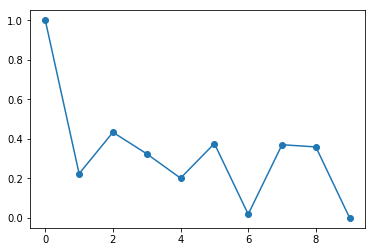

In [120]:
plt.plot(abs(cgc),'o-')